# CS5344 Subreddit Recommendation System

uses v2 data

# Build Graph

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from tqdm import tqdm

In [2]:
#Read 100K user data
df1 = pd.read_csv('all_exc_2k_v2.csv') \
        .drop(columns='Unnamed: 0')
print('Shape of data:', df1.shape)
#df_train=df1

Shape of data: (854187, 6)


In [3]:
#Read 2K user data which is used in testing
df2 = pd.read_csv('test_2k_unmasked_v2.csv') \
        .drop(columns='Unnamed: 0')
print('Shape of data:', df2.shape)

Shape of data: (3980, 6)


In [4]:
#combine datasets to get single train dataset
df_train= pd.concat([df1,df2],axis=0, ignore_index=True)
print('Shape of data:', df_train.shape)
df_train.tail()

Shape of data: (858167, 6)


,author_fullname,author,subreddit,subreddit_ranking,t_user_sub_comments,num_of_subreddit
858162,t2_3o2itl4c,AcidicMushrooms,AskReddit,1,15,2
858163,t2_3of6rni4,digitalpimp762,AskReddit,1,16,3
858164,t2_3qmwrluf,BrainzWasHere,AskReddit,1,49,6
858165,t2_m0gx2,themoviehero,AskReddit,1,5,5
858166,t2_ms7p4,ddaug4uf,AskReddit,1,5,2


df_reddit = pd.read_csv('user_100K.csv')
df_reddit.drop(columns='Unnamed: 0', inplace=True)
print('Shape of data:', df_reddit.shape)
df_reddit.head()

In [5]:
#Find unique user and subreddits
print('No of users:', df_train.author_fullname.nunique())
print('No of subreddit:', df_train.subreddit.nunique())

No of users: 282981
No of subreddit: 100


In [6]:
#add suffix to user 
df_train.author_fullname = df_train.author_fullname.apply(lambda x: 'us_' + x)
#add suffix to subreddit
df_train.subreddit = df_train.subreddit.apply(lambda x: 'sr_' + x)
print('Shape of data:', df_train.shape)
df_train.head()

Shape of data: (858167, 6)


,author_fullname,author,subreddit,subreddit_ranking,t_user_sub_comments,num_of_subreddit
0,us_t2_102znx,PsystrikeSmash,sr_AskReddit,1,8,2
1,us_t2_102znx,PsystrikeSmash,sr_teenagers,3,13,2
2,us_t2_103nb8,bluewave41,sr_AmItheAsshole,7,18,2
3,us_t2_103nb8,bluewave41,sr_relationship_advice,28,48,2
4,us_t2_108k3p,SmoothPounding,sr_DestinyTheGame,29,14,2


In [7]:
# get unique user and subreddit
nodes_a = df_train.author_fullname.unique()
nodes_sr = df_train.subreddit.unique()
print('No of users:', len(nodes_a))
print('No of subreddit:', len(nodes_sr))

No of users: 282981
No of subreddit: 100


In [8]:
# create Nodes list 
nodes_a_tupple = [] 
nodes_sr_tupple = []

#store user in bipartite user nodes
for nodes in nodes_a:
    nodes_a_tupple.append((nodes, {'bipartite' : 'user'}))
    
#store subreddit in bipartite subreddit nodes        
for nodes in nodes_sr:
    nodes_sr_tupple.append((nodes, {'bipartite' : 'subreddit'}))

In [9]:
#create edges list
edges_tupple = []
for i in range(df_train.shape[0]):
    edges_tupple.append((df_train.loc[i, 'author_fullname'], df_train.loc[i, 'subreddit'], {'weight': df_train.loc[i, 't_user_sub_comments']}))

In [10]:
#view edges
print('Edges list:\n',edges_tupple[0:3])

Edges list:
 [('us_t2_102znx', 'sr_AskReddit', {'weight': 8}), ('us_t2_102znx', 'sr_teenagers', {'weight': 13}), ('us_t2_103nb8', 'sr_AmItheAsshole', {'weight': 18})]


In [11]:
#create a graph
G = nx.Graph()
#add nodes of user
G.add_nodes_from(nodes_a_tupple)
#add nodes of subreddit
G.add_nodes_from(nodes_sr_tupple)
#add edges of user
G.add_edges_from(edges_tupple)

In [12]:
import threading
threading.activeCount()

5

In [13]:
#View nodes in graph
i = 1
print('Nodes in graph:\n')
for n in G.nodes(data=True):
    if i <3:
        print(n)
    i=i+1

Nodes in graph:

('us_t2_102znx', {'bipartite': 'user'})
('us_t2_103nb8', {'bipartite': 'user'})


In [14]:
#View edges in graph
print('Edge in graph:\n',G.edges('us_t2_102znx'))

Edge in graph:
 [('us_t2_102znx', 'sr_AskReddit'), ('us_t2_102znx', 'sr_teenagers')]


In [15]:
#User and subreddit list from graph
users = [n for n,d in G.nodes(data=True) if d['bipartite']=='user']
subreddits = [n for n,d in G.nodes(data=True) if d['bipartite']=='subreddit']
print('No of users:', len(users))
print('No of subreddit:', len(subreddits))

No of users: 282981
No of subreddit: 100


## Adjacency Matrix

In [16]:
# bipartite adjacency matrix
adjacency_matrix = bipartite.biadjacency_matrix(G, row_order=users).todense() #order of row is users
adjacency_matrix = np.squeeze(np.asarray(adjacency_matrix)) #convert to numpy matrix 

#view 1st row of adjacency matrix
print('1st row of adjacency matrix:',adjacency_matrix[0,:])

1st row of adjacency matrix: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 13.  0.  0.  0.  0.  0.  0.]


In [17]:
#store adjacency matrix in pandas dataframe
adj_matrix = pd.DataFrame(adjacency_matrix, index=users)
#adj_matrix = pd.DataFrame(adjacency_matrix)
print('Shape of adjacency matrix:', adj_matrix.shape)
adj_matrix.head()

Shape of adjacency matrix: (282981, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
us_t2_102znx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
us_t2_103nb8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
us_t2_108k3p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
us_t2_10avxq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
us_t2_10cpek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User-User Collaborative Filtering

In [18]:
def most_similar_users(adjmat, user,k=40):
    from sklearn.metrics.pairwise import cosine_similarity
    #print(user)
    #print(adjmat.shape)
    #Calculate cosine simsilarity and store it last column
    adjmat['cosinesim'] = cosine_similarity(adjmat, adjmat.loc[user].values.reshape(1,-1))
    
    #Calculate top 10 cosine similarity values
    cosine_values = np.sort(adjmat['cosinesim'].unique())[::-1]
    cosine_similarity = adjmat.loc[adjmat['cosinesim'].isin(cosine_values[0:k]), 'cosinesim']
    
    #remove user 
    cosine_similarity = cosine_similarity[cosine_similarity.index!=user]
    
    #store similar user list
    users_similar = cosine_similarity.index.tolist()
    
    #store cosine similarity of similar users
    user_cosine_similarity = cosine_similarity.tolist()
    

    # Return list of users that share maximal similarity
    return users_similar, user_cosine_similarity

In [19]:
def recommend_repositories(G, user, users_similar, similarity_value):
    #Find subreddits of user from edges
    #print(users_similar)
    #print(user)
    user_subreddit = set(G.neighbors(user))
    #print(user_subreddit)
    
    ranking = pd.DataFrame(columns=['subreddit', 'comment_sim', 'sim'])

    for i in range(len(users_similar)):
        #print(users_similar[i], similarity_value[i])
        for x in G.edges(users_similar[i], data=True):
            if x[1] not in user_subreddit:
                #print(x[1], x[2]['weight']*similarity_value[i], similarity_value[i])
                ranking = ranking.append({'subreddit':x[1], 'comment_sim':x[2]['weight']*similarity_value[i], 'sim':similarity_value[i]}, ignore_index=True)

    #group by subreddit
    r1 = ranking.groupby('subreddit').sum()
    #find predicted comments for each subreddit
    subreddit_recommendation =  pd.Series((r1['comment_sim']/r1['sim']).sort_values(ascending=False))
    #Take top 10 subreddits
    subreddit_recommendation[0:10]
          
    # Identify subreddits counts 
    return subreddit_recommendation[0:10]

In [20]:
def recommendation_collaborative(G, adjmat, user, k):
    #print(user)
       
    #Find similar user list and cosine similarity score 
    users_similar, similarity_value = most_similar_users(adjmat, user, k)
    
    #Find subreddit recommended 
    result = recommend_repositories(G, user, users_similar, similarity_value)
    #print(result)
    
    return users_similar, similarity_value, result

## Test single User

In [21]:
#Take 200K users of adjacency matrix
#df = adj_matrix.iloc[0:200000]
#select user to recommend subreddit
k=200
#user = 'us_t2_10o07a'
user = 'us_t2_10ckl1le'
#user = 'us_Carnalus_Luciferno'
adm = adj_matrix.copy()
users_similar, similarity_value, result = recommendation_collaborative(G, adm, user, k)
#print(result)
#Store subreddit recommendation
#subreddit_pred = result.index[0]
#print('Subreddit recommended:', subreddit_pred)


In [22]:
print(result)

subreddit
sr_canada              21.412382
sr_2007scape           20.586604
sr_torontoraptors      17.283440
sr_HistoryMemes        15.000000
sr_gaming              14.391029
sr_FortNiteBR          13.925276
sr_unpopularopinion    13.170944
sr_europe              12.256556
sr_conspiracy          12.000000
sr_baseball            11.000000
dtype: float64


In [23]:
len(result)

10

In [24]:
dfg = pd.DataFrame()
dfg['user'] =users_similar 
dfg['cosine_similarity'] =similarity_value 
dfg

,user,cosine_similarity
0,us_t2_2zz65dgl,0.747409
1,us_t2_4r9lma,0.707107
2,us_t2_65q4m,0.707107
3,us_t2_gwh7r,0.894427
4,us_t2_o540w,0.840941
...,...,...
480,us_t2_1sm5gp9,0.768221
481,us_t2_3km1jnob,0.747409
482,us_t2_7jc8s,0.698262
483,us_t2_g0o3m,0.743294


In [25]:
print(users_similar)

['us_t2_2zz65dgl', 'us_t2_4r9lma', 'us_t2_65q4m', 'us_t2_gwh7r', 'us_t2_o540w', 'us_t2_3vmgj7vc', 'us_t2_ekb6s', 'us_t2_iwgvm', 'us_t2_ar0cl', 'us_t2_jm99q', 'us_t2_nxm00', 'us_t2_12jn2y', 'us_t2_hkdxy29', 'us_t2_p8eu8', 'us_t2_3n5vvcxi', 'us_t2_q03ws', 'us_t2_b49dw', 'us_t2_qi5l9', 'us_t2_2lqtu0pe', 'us_t2_3erqqvbo', 'us_t2_3hlef', 'us_t2_3r8r7u7x', 'us_t2_d1sz7xv', 'us_t2_o9l3hi', 'us_t2_3ivjah9g', 'us_t2_3uu0w68k', 'us_t2_7p744', 'us_t2_173juu', 'us_t2_6djnx', 'us_t2_exh50', 'us_t2_ey6n5', 'us_t2_gfc48', 'us_t2_sfhc9', 'us_t2_16i8jj', 'us_t2_nywnq', 'us_t2_15es22', 'us_t2_3t1b77pk', 'us_t2_i757ked', 'us_t2_kwaou', 'us_t2_w4yh2', 'us_t2_wevzp', 'us_t2_1251je', 'us_t2_21rbk92g', 'us_t2_31gy55kw', 'us_t2_quv6g', 'us_t2_1jk4iytl', 'us_t2_3w19uz31', 'us_t2_ly81t', 'us_t2_dmcrke9', 'us_t2_13nx7p', 'us_t2_146tumk4', 'us_t2_j720f', 'us_t2_kaxdg', 'us_t2_11zsql', 'us_t2_1w8jkesk', 'us_t2_3y89z9d', 'us_t2_mdoo1', 'us_t2_t9bdq', 'us_t2_155n4tcl', 'us_t2_16eu2e', 'us_t2_3amd10ot', 'us_t2_8ehwg'

In [26]:
similarity_value

[0.7474093186836597,
 0.7071067811865476,
 0.7071067811865476,
 0.8944271909999159,
 0.8409413299642188,
 0.6643638388299198,
 0.7071067811865475,
 0.6992520921470976,
 0.851658316704544,
 0.8944271909999159,
 0.7071067811865476,
 0.813733471206735,
 0.7881104062391007,
 0.9340518348510853,
 0.7200034083082246,
 0.7071067811865476,
 0.9804207410201666,
 0.8320502943378436,
 0.7808688094430304,
 0.6985354731356995,
 0.7863336509949341,
 0.9849172563070865,
 0.7071067811865475,
 0.6860641654305725,
 0.7592566023652966,
 0.9847835588179368,
 0.6689647316224497,
 0.7592566023652966,
 0.7310552682428689,
 0.7682212795973759,
 0.7343880736345255,
 0.8087360843031884,
 0.9269962426559802,
 0.7682212795973759,
 0.7071067811865475,
 0.7071067811865476,
 0.9505248738861797,
 0.9552858906913457,
 0.8,
 0.7208539969983191,
 0.7071067811865475,
 0.6689647316224497,
 0.9408874118687268,
 0.7071067811865476,
 0.6839411288813297,
 0.7808688094430304,
 0.7071067811865475,
 0.813733471206735,
 0.8320502

## Evaluation

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
#Load test data which is masked in graph and used for evaluatin predictions
df_test = pd.read_csv('test_2k_mask_answer_v2.csv')
df_test.drop(columns='Unnamed: 0', inplace=True)
print('Shape of data:', df_test.shape)
df_test.head()

Shape of data: (2000, 6)


,author_fullname,author,subreddit,subreddit_ranking,t_user_sub_comments,num_of_subreddit
0,t2_106bpk58,Apc_007,Animemes,26,54,2
1,t2_10aj9l3k,Hollow661,conspiracy,88,11,3
2,t2_10c8e5,crystaltorta,politics,4,10,2
3,t2_10ckl1le,DisagreeableFool,PS4,99,5,2
4,t2_10fhvx,Goldberry42,AmItheAsshole,7,43,2


In [29]:
#add suffix to user 
df_test.author_fullname = df_test.author_fullname.apply(lambda x: 'us_' + x)
#add suffix to subreddit
df_test.subreddit = df_test.subreddit.apply(lambda x: 'sr_' + x)
print('Shape of data:', df_test.shape)
df_test.head()

Shape of data: (2000, 6)


,author_fullname,author,subreddit,subreddit_ranking,t_user_sub_comments,num_of_subreddit
0,us_t2_106bpk58,Apc_007,sr_Animemes,26,54,2
1,us_t2_10aj9l3k,Hollow661,sr_conspiracy,88,11,3
2,us_t2_10c8e5,crystaltorta,sr_politics,4,10,2
3,us_t2_10ckl1le,DisagreeableFool,sr_PS4,99,5,2
4,us_t2_10fhvx,Goldberry42,sr_AmItheAsshole,7,43,2


In [30]:
k_cosine = [10, 20, 40, 100, 200]
#df_test.shape[0]
for k in k_cosine:
    for i in tqdm(range(df_test.shape[0])):
        user = df_test.loc[i,'author_fullname']
        #print(user)

        adm = adj_matrix.copy()
        users_similar, similarity_value, result_subreddit = recommendation_collaborative(G, adm, user, k)

        #Store subreddit recommendation
        if len(result_subreddit)!=0:
            subreddit_pred = result_subreddit.index[0:10].to_list()
        else:
            subreddit_pred = 'no result'

        #print('Subreddit recommended:', subreddit_pred)

        #save predicted results
        #df_test.loc[i,'subreddit_name_pred'] = subreddit_pred
        df_test.loc[i,'subreddit_name_pred'] = " ".join(str(x) for x in subreddit_pred)

        #calculate top 1 accuracy
        if df_test.loc[i,'subreddit'] in subreddit_pred[0:1]:
            df_test.loc[i,'accuracy_1_k'+str(k)] = 1
        else:
            df_test.loc[i,'accuracy_1_k'+str(k)] = 0

        #calculate top 5 accuracy
        if df_test.loc[i,'subreddit'] in subreddit_pred[0:5]:
            df_test.loc[i,'accuracy_5_k'+str(k)] = 1
        else:
            df_test.loc[i,'accuracy_5_k'+str(k)] = 0

        #calculate top 10 accuracy
        if df_test.loc[i,'subreddit'] in subreddit_pred[0:10]:
            df_test.loc[i,'accuracy_10_k'+str(k)] = 1
        else:
            df_test.loc[i,'accuracy_10_k'+str(k)] = 0

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [23:49<00:00,  1.40it/s]


In [31]:
#Check accuracy
for k in k_cosine:
    print('K_cosine similairty value:', k)
    print('Accuracy with 1 sub reddit recommended:',(df_test['accuracy_1_k'+str(k)].sum()/df_test.shape[0])*100)
    print('Accuracy with 5 sub reddit recommended:',(df_test['accuracy_5_k'+str(k)].sum()/df_test.shape[0])*100)
    print('Accuracy with 10 sub reddit recommended:',(df_test['accuracy_10_k'+str(k)].sum()/df_test.shape[0])*100)
    print(20*'-')

K_cosine similairty value: 10
Accuracy with 1 sub reddit recommended: 4.3
Accuracy with 5 sub reddit recommended: 14.05
Accuracy with 10 sub reddit recommended: 19.2
--------------------
K_cosine similairty value: 20
Accuracy with 1 sub reddit recommended: 3.25
Accuracy with 5 sub reddit recommended: 15.4
Accuracy with 10 sub reddit recommended: 24.349999999999998
--------------------
K_cosine similairty value: 40
Accuracy with 1 sub reddit recommended: 3.15
Accuracy with 5 sub reddit recommended: 14.099999999999998
Accuracy with 10 sub reddit recommended: 28.7
--------------------
K_cosine similairty value: 100
Accuracy with 1 sub reddit recommended: 1.7500000000000002
Accuracy with 5 sub reddit recommended: 11.700000000000001
Accuracy with 10 sub reddit recommended: 25.85
--------------------
K_cosine similairty value: 200
Accuracy with 1 sub reddit recommended: 1.2
Accuracy with 5 sub reddit recommended: 8.25
Accuracy with 10 sub reddit recommended: 19.85
--------------------


In [32]:
df_test.head()

,author_fullname,author,subreddit,subreddit_ranking,t_user_sub_comments,num_of_subreddit,subreddit_name_pred,accuracy_1_k10,accuracy_5_k10,accuracy_10_k10,...,accuracy_10_k20,accuracy_1_k40,accuracy_5_k40,accuracy_10_k40,accuracy_1_k100,accuracy_5_k100,accuracy_10_k100,accuracy_1_k200,accuracy_5_k200,accuracy_10_k200
0,us_t2_106bpk58,Apc_007,sr_Animemes,26,54,2,sr_pokemon sr_todayilearned sr_freefolk sr_con...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,us_t2_10aj9l3k,Hollow661,sr_conspiracy,88,11,3,sr_nba sr_Cricket sr_gonewild sr_marvelstudios...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,us_t2_10c8e5,crystaltorta,sr_politics,4,10,2,sr_AskOuija sr_gonewild sr_dankmemes sr_NoStup...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,us_t2_10ckl1le,DisagreeableFool,sr_PS4,99,5,2,sr_canada sr_2007scape sr_torontoraptors sr_Hi...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,us_t2_10fhvx,Goldberry42,sr_AmItheAsshole,7,43,2,sr_The_Donald sr_Minecraft sr_gonewild sr_Publ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
#Save results
df_test.to_csv('resultv2_weighted_grid.csv',index=False)

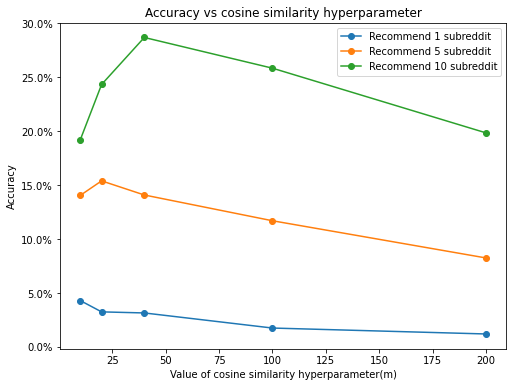

In [94]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

k_cosine = [10, 20, 40, 100, 200]
performance = np.array([[4.3, 3.25, 3.15, 1.75, 1.2],
               [14.05, 15.4, 14.09, 11.7, 8.25],
               [19.2, 24.34, 28.7, 25.85, 19.85]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
plt.plot(k_cosine, performance[0], marker='o', label='Recommend 1 subreddit')
plt.plot(k_cosine, performance[1], marker='o', label='Recommend 5 subreddit')
plt.plot(k_cosine, performance[2], marker='o', label='Recommend 10 subreddit')

plt.title('Accuracy vs cosine similarity hyperparameter')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Accuracy')
plt.xlabel('Value of cosine similarity hyperparameter(m)')
plt.legend()
plt.show()

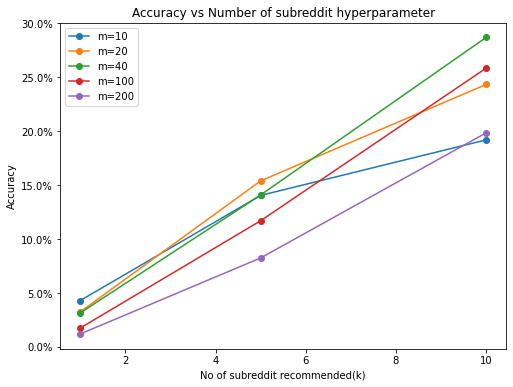

In [99]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

n_sr = [1 ,5, 10]
performance_T = performance.T

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
plt.plot(n_sr, performance_T[0], marker='o', label='m=10')
plt.plot(n_sr, performance_T[1], marker='o', label='m=20')
plt.plot(n_sr, performance_T[2], marker='o', label='m=40')
plt.plot(n_sr, performance_T[3], marker='o', label='m=100')
plt.plot(n_sr, performance_T[4], marker='o', label='m=200')

plt.title('Accuracy vs Number of subreddit hyperparameter')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Accuracy')
plt.xlabel('No of subreddit recommended(k)')
plt.legend()
plt.show()